In [1]:
%load_ext rpy2.ipython
import numpy as np
import pandas as pd

# A trivial case

In [10]:
import imp
k_means = imp.load_source('k_means', '../lib/k_means.py')
data = np.array([  
      [1, 1],  
      [2, 2],  
      [3, 3],  
      [10, 10],  
      [11, 11],  
      [12, 12]  
    ])

In [11]:
k_means.KMeans(data, 2).fit()

[Cluster(center=[ 11.  11.], members=[array([10, 10]), array([11, 11]), array([12, 12])], converged=True),
 Cluster(center=[ 2.  2.], members=[array([1, 1]), array([2, 2]), array([3, 3])], converged=True)]

# The iris dataset

In [17]:
data = pd.read_csv('iris.data.txt', names=['seplength', 'sepwidth', 'petlength', 'petwidth', 'class'])

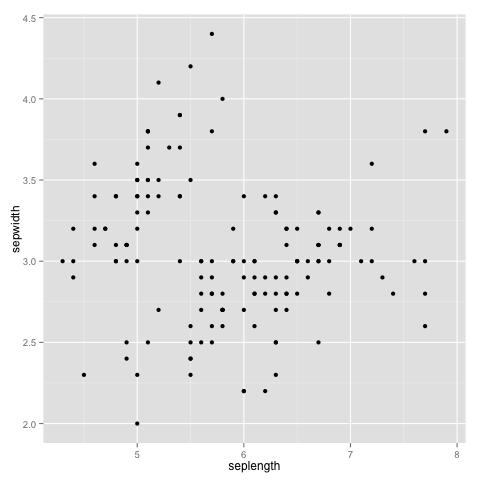

In [20]:
%%R -i data
library(ggplot2)
qplot(data=data, x=seplength, y=sepwidth)

In [26]:
clusters = k_means.KMeans(data[['seplength','sepwidth']].values, 3).fit()

In [41]:
c1 = map(lambda x: np.append(x, 'cluster0'), clusters[0].members)
c2 = map(lambda x: np.append(x, 'cluster1'), clusters[1].members)
c3 = map(lambda x: np.append(x, 'cluster2'), clusters[2].members)
data = np.append(np.append(c1, c2, axis=0), c3, axis=0)
data = pd.DataFrame(data)

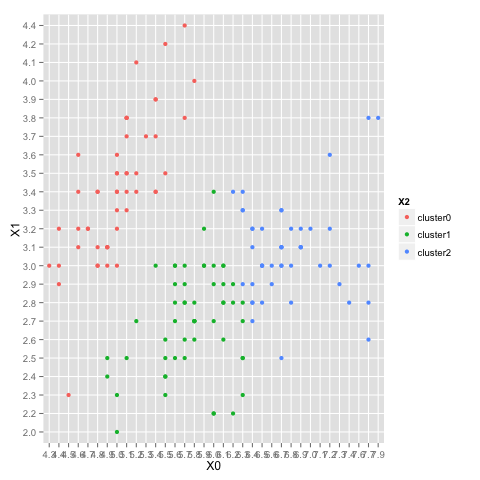

In [43]:
%%R -i data
library(ggplot2)
qplot(data=data, x=X0, y=X1, color=X2)